In [10]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Donnees simulees')

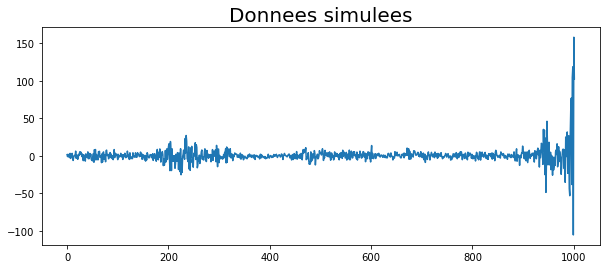

In [12]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Donnees simulees', fontsize=20)

Text(0.5, 1.0, 'Volatilite')

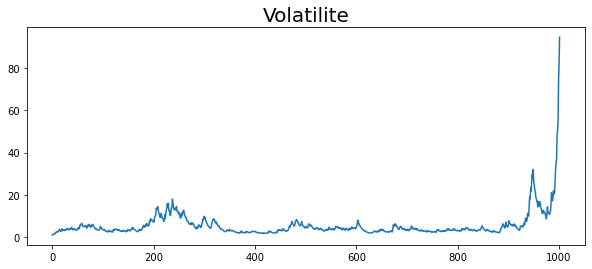

In [13]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Volatilite', fontsize=20)

Text(0.5, 1.0, 'Donnees et volatilite')

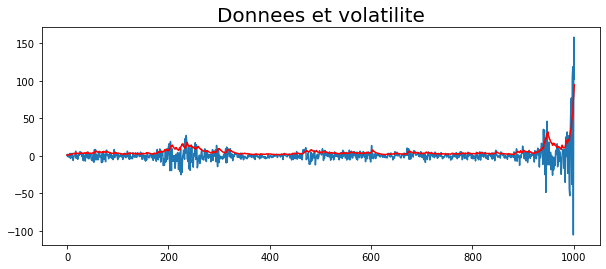

In [14]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Donnees et volatilite', fontsize=20)

C:\Users\hp\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


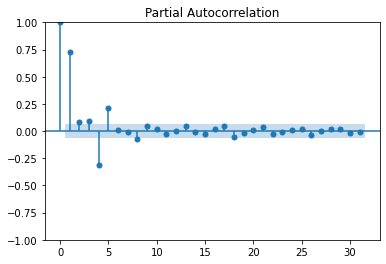

In [15]:
plot_pacf(np.array(series)**2)
plt.show()

In [19]:
train, test = series[:-test_size], series[-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4724.141787239638
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3081.213019558898
Iteration:      3,   Func. Count:     20,   Neg. LLF: 328575139.6691619
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2501.235956509413
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3464.074805269752
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2499.7545048351367
Iteration:      7,   Func. Count:     45,   Neg. LLF: 2499.3285240848018
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2499.3282940664885
Iteration:      9,   Func. Count:     55,   Neg. LLF: 2499.328292077158
Iteration:     10,   Func. Count:     59,   Neg. LLF: 2499.3282920774272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2499.328292077158
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2499.33
Distribution:                  Normal   AIC:                           5006.66
Method:            Maximum Likelihood   BIC:                           5025.88
                                        No. Observations:                  902
Date:                Mon, Apr 25 2022   Df Residuals:                      901
Time:                        18:26:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0352      0.109      0.322      0.748 [ -0.179,  0.250]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3724      0.146      2.553  1.067e-02 [8.655e-02,  0.658]
alpha[1]       0.1457  2.138e-02      6.813  9.534e-12   [  0.104,  0.188]
beta[1]        0.8403  2.075e-02     40.492      0.000   [  0.800,  0.881]
==========================================================================

Covariance estimator: robust
"""